# Hip√≥tesis 4

#### "Las provincias situadas en el sur de Espa√±a (aquellas al sur de Madrid) tienden a utilizar menos dispositivos de aprovechamiento de energ√≠a renovable que las del norte." 

Las diferencias clim√°ticas entre el norte y sur de Espa√±a pueden ser una variable crucial a la hora de instalar dispositivos de energ√≠a renovable pero no la √∫nica. El clima influye en la cantidad de energ√≠a que se puede producir pero tambi√©n en la que se consume.

Adem√°s puede influir el √°mbito socioecon√≥mico, las provincias con mayor poder adquisitivo podr√≠an gastarse m√°s en energ√≠a renovable o las m√°s pobres podr√≠an estar motivadas por el ahorro en la factura de la luz. Otras posibles factores de influencia, pueden ser los tama√±os familiares o la edad.

## Preparaci√≥n del entorno

In [72]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, DistanceMetric

GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

import warnings
warnings.filterwarnings("ignore")

## Datos

Los datos tendr√° como base la tarjeta de datos 4 (`data_card_4_df.csv`), de la que se eliminar√° la variable edad para a√±adir la variable de `Edad media` de la tarjeta de datos 1 (`data_card_1_df.csv`).

La mediana es una medida m√°s representativa que la media, al no estar influida por valores extremos. Sin embargo, en este caso, la forma de calcular la mediana en el paso de preprocesamiento, hace que la variable de edad est√© segmentada en: 42, 47 y 52 a√±os. Por esto, se ha decidido utilizar la media, con valores continuos, y comparar los resultados con los obtenidos usando la mediana.

In [73]:
# cargar los datos
df1 = pd.read_csv(GOLD_DATA_PATH + "data_card_1_df.csv", sep=";", encoding = 'latin')

df4 = pd.read_csv(GOLD_DATA_PATH + "data_card_4_df.csv", sep=";", encoding = 'latin')
df4.drop(columns=["Unnamed: 0"], inplace=True)

In [74]:
# comprobamos valores de edad mediana
print("Valores de la columna de edad mediana: ",df4['Mediana edad'].unique())
print("Valores de la columna de edad media: ",df1['Edad media'].unique())
df4.drop(columns=["Mediana edad"], inplace=True)

Valores de la columna de edad mediana:  [47 42 52]
Valores de la columna de edad media:  [43.67752322 43.76688925 40.32044849 44.56569142 48.68338964 43.78070111
 42.89217781 46.10324759 46.68604543 45.91393265 43.51042471 44.06624206
 47.24261334 45.9213124  46.53167185 42.21228508 43.69378508 45.1453981
 42.24367027 42.74662549 41.69619621 42.09964389 45.25832978 43.76587026
 49.24604232 43.24068113 49.98722796 42.52777299 40.69691124 42.41661504
 43.27407369 50.72758972 48.2027872  46.04912329 44.45862354 48.31173251
 45.84952829 41.71263395 47.28416896 42.88057706 46.11338258 42.21760228
 43.40447056 46.25052754 51.06958706 44.53106149 47.8660301 ]


In [75]:
# sustituir la variable edad
df4 = pd.concat([df4, df1['Edad media']], axis=1)
df4.set_index('Provincias', inplace=True)

In [76]:
df4.head()

Porcentaje con dispositivo    Renta  Producci√≥n media  \
Provincias                                                                
Albacete                            4.314062  29549.0        136.528958   
Alicante/Alacant                    4.036060  27540.0        135.823750   
Almer√≠a                             6.713842  27301.0        140.478389   
Araba/√Ålava                        10.445424  36848.0        107.768333   
Asturias                            5.031368  31841.0         92.622917   

                  Familia de 1 padres y 0 hijos  \
Provincias                                        
Albacete                               0.033132   
Alicante/Alacant                       0.041038   
Almer√≠a                                0.030276   
Araba/√Ålava                            0.033775   
Asturias                               0.056932   

                  Familia de 1 padres y 1 hijos  \
Provincias                                        
Albacete                               0.072565   
Alicante/Alacant                       0.094143   
Almer√≠a                                0.090071   
Araba/√Ålava                            0.097398   
Asturias                               0.115216   

                  Familia de 1 padres y 2 hijos  \
Provincias                                        
Albacete                               0.044648   
Alicante/Alacant                       0.045081   
Almer√≠a                                0.042470   
Araba/√Ålava                            0.045232   
Asturias                               0.035539   

                  Familia de 2 padres y 0 hijos  \
Provincias                                        
Albacete                               0.356690   
Alicante/Alacant                       0.394342   
Almer√≠a                                0.349780   
Araba/√Ålava                            0.401223   
Asturias                               0.432127   

                  Familia de 2 padres y 1 hijos  \
Provincias                                        
Albacete                               0.204834   
Alicante/Alacant                       0.197734   
Almer√≠a                                0.201309   
Araba/√Ålava                            0.194786   
Asturias                               0.211392   

                  Familia de 2 padres y 2 hijos  Edad media  
Provincias                                                   
Albacete                               0.288130   43.677523  
Alicante/Alacant                       0.227663   43.766889  
Almer√≠a                                0.286094   40.320448  
Araba/√Ålava                            0.227587   44.565691  
Asturias                               0.148794   48.683390

## An√°lisis de datos con clasificaci√≥n manual

En principio, consideramos la siguiente divisi√≥n de provincias en el norte y sur de Espa√±a:

In [77]:
norte=['Araba/√Ålava', 'Asturias', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria', 'Coru√±a, A', 'Gipuzkoa', 'Girona', 'Guadalajara', 'Huesca', 'Le√≥n', 'Lleida', 'Lugo', 'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Rioja, La', 'Salamanca', 'Segovia', 'Soria', 'Tarragona', 'Teruel', 'Valladolid', 'Zamora', 'Zaragoza', '√Åvila']

df4['Grupo'] = [0 if x in norte else 1 for x in df4.index]

In [78]:
df4.groupby('Grupo').mean()

Porcentaje con dispositivo         Renta  Producci√≥n media  \
Grupo                                                               
0                        5.155543  33132.964286        118.608126   
1                        5.732830  29330.842105        135.241652   

       Familia de 1 padres y 0 hijos  Familia de 1 padres y 1 hijos  \
Grupo                                                                 
0                           0.043806                       0.092551   
1                           0.035833                       0.083094   

       Familia de 1 padres y 2 hijos  Familia de 2 padres y 0 hijos  \
Grupo                                                                 
0                           0.038844                       0.401841   
1                           0.042401                       0.367766   

       Familia de 2 padres y 1 hijos  Familia de 2 padres y 2 hijos  \
Grupo                                                                 
0                           0.207682                       0.215275   
1                           0.205703                       0.265203   

       Edad media  
Grupo              
0       46.134766  
1       43.108917

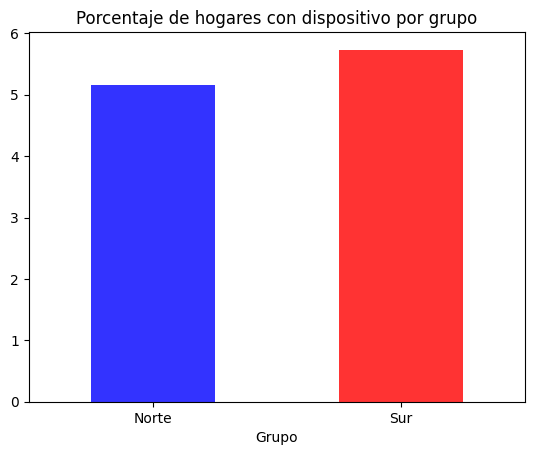

In [79]:
mean_dispositivo = df4.groupby('Grupo').mean()['Porcentaje con dispositivo']
mean_dispositivo.plot(kind='bar', color=['blue', 'red'], alpha=0.8)
plt.title('Porcentaje de hogares con dispositivo por grupo')
plt.xticks([0, 1], ['Norte', 'Sur'], rotation=0)
plt.show()

Los datos muestran que la implantaci√≥n de energ√≠as renovables es muy similar, aunque en el sur es mayor. Sin embargo, la divisi√≥n hecha puede no ser la m√°s adecuada ya que el criterio de divisi√≥n es muy subjetivo. Por ello, se realizar√° un an√°lisis de clustering para determinar la divisi√≥n m√°s adecuada.

In [80]:
df4.drop(columns=['Grupo'], inplace=True)

## Estandarizaci√≥n de los datos

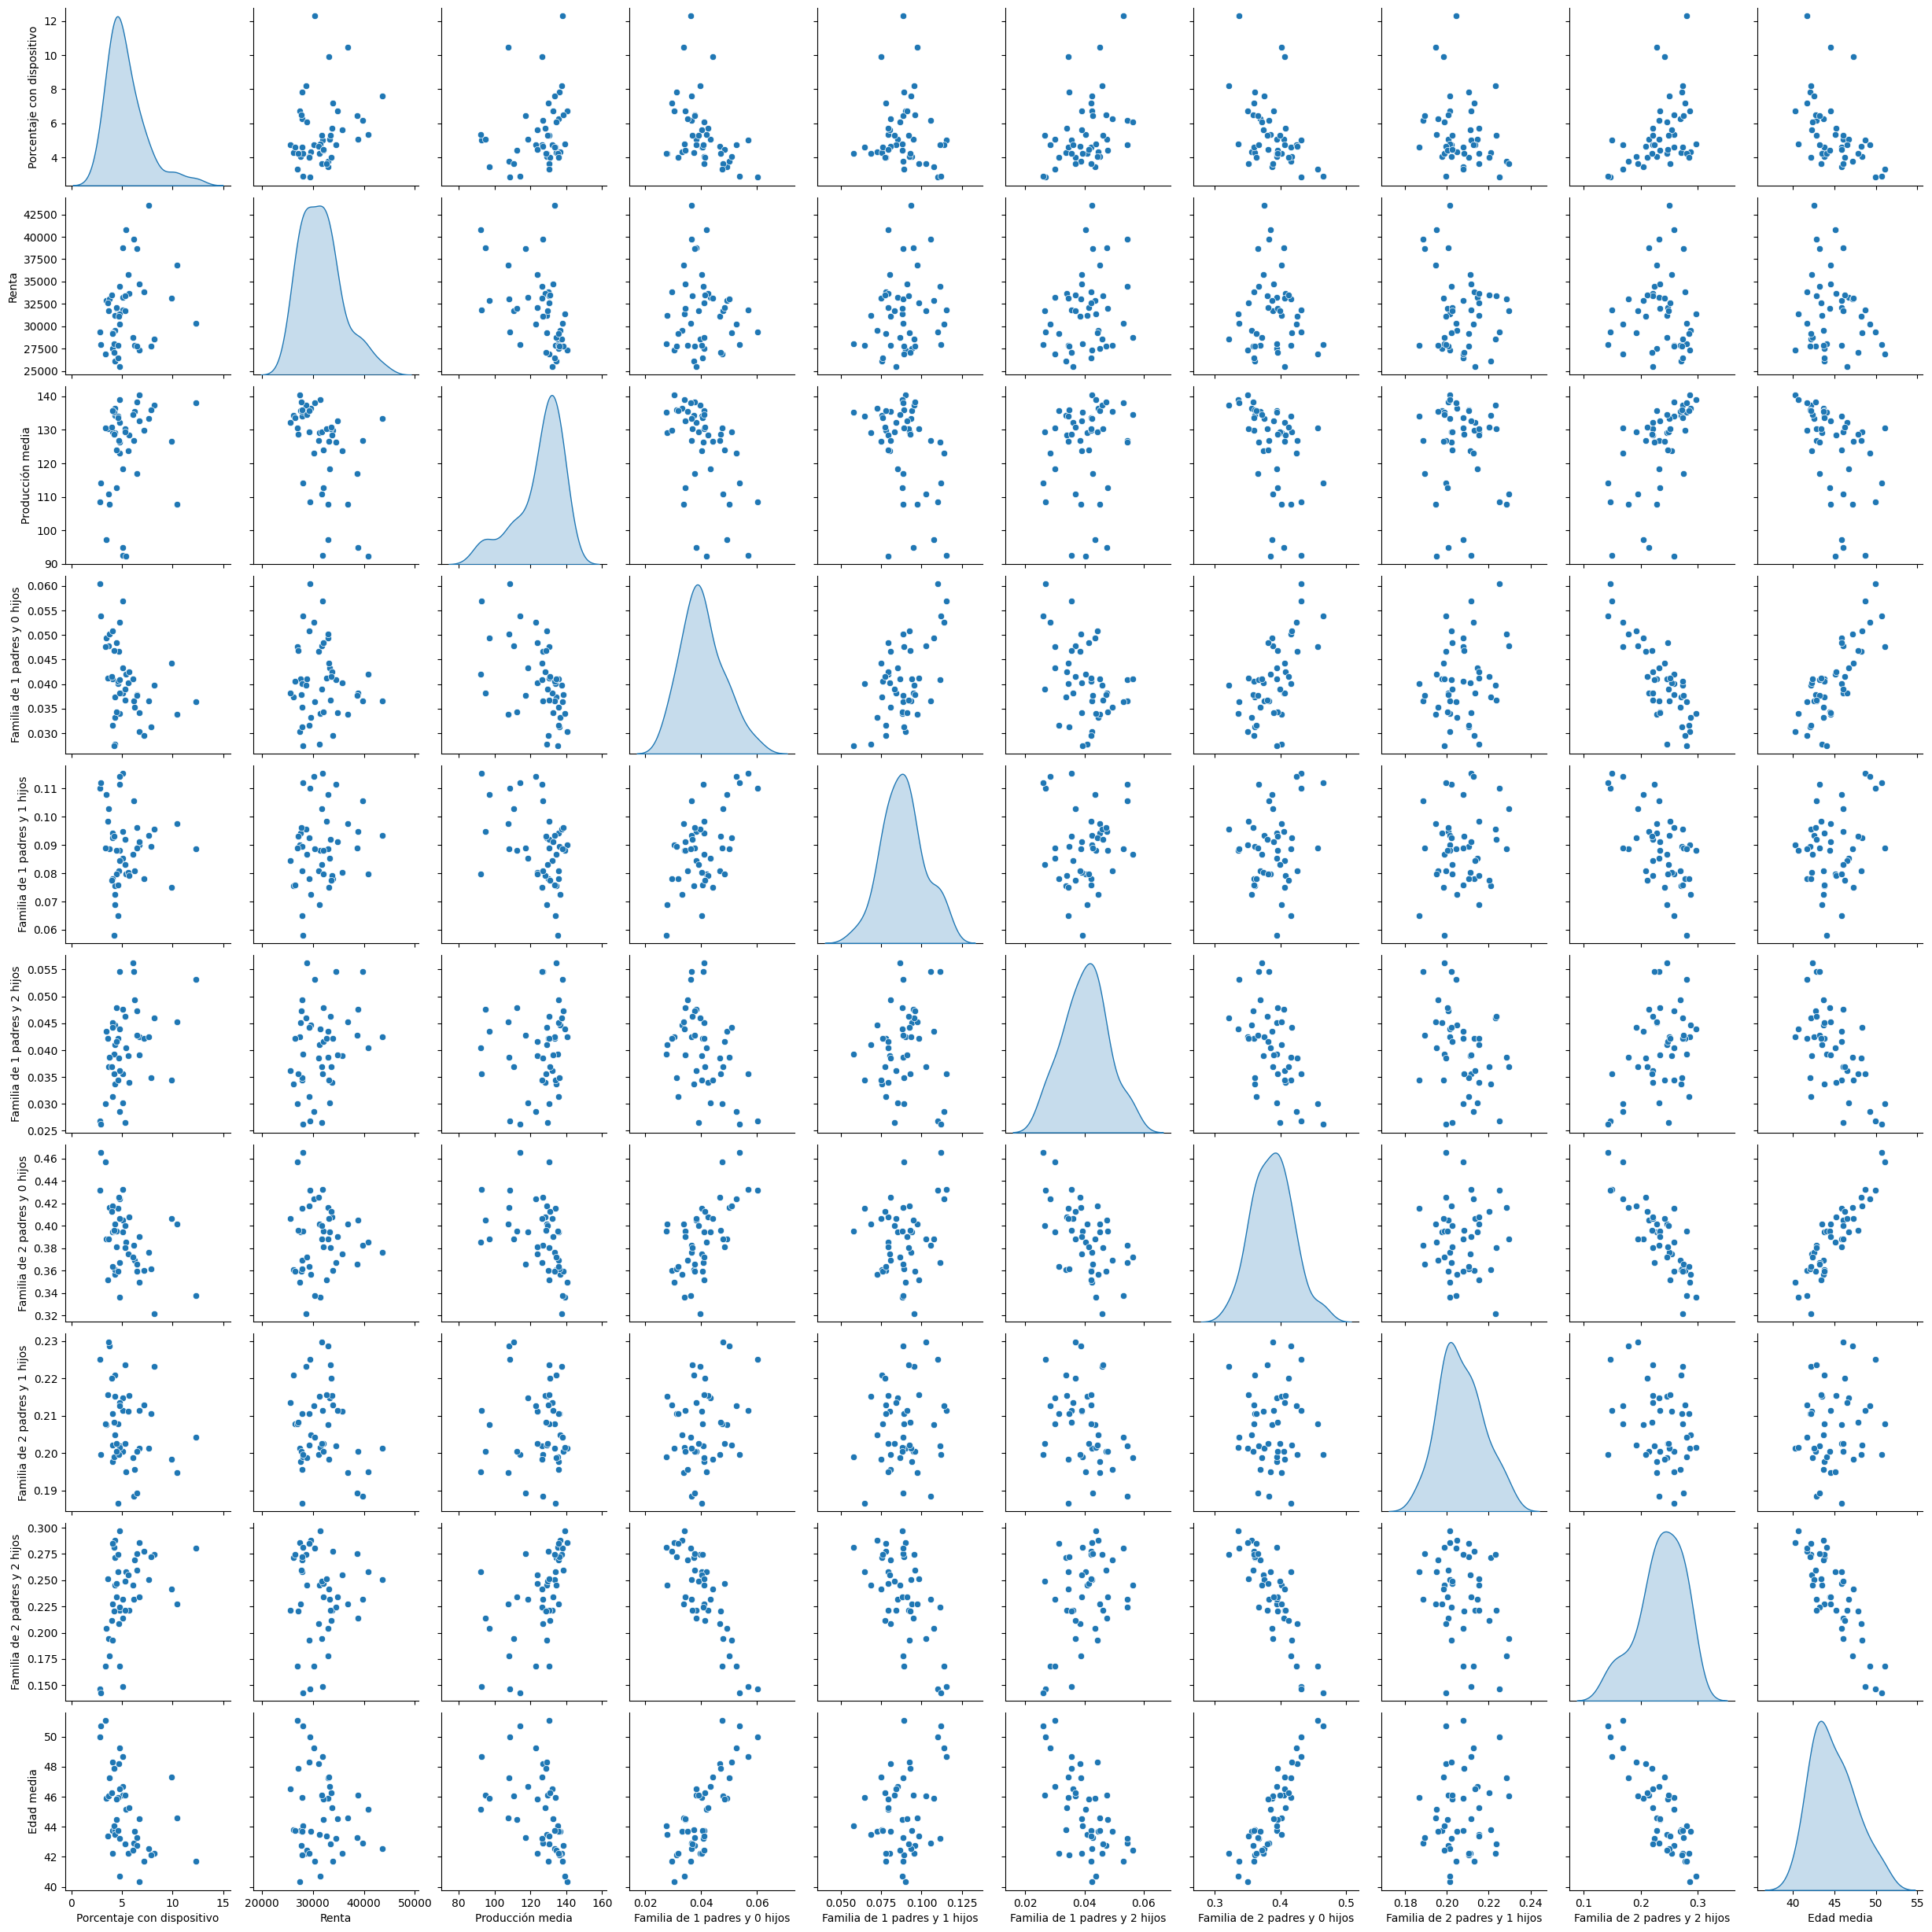

In [81]:
sns.pairplot(df4, diag_kind='kde')

Cada variable tiene una escala diferente, por lo que es necesario estandarizar los datos para que todas tengan la misma importancia en el an√°lisis.
Se ha elegido el MinMaxScaler para que los valores est√©n entre 0 y 1, intentando modificar lo menos posible la distribuci√≥n de los datos.

In [82]:
# Escalado de los datos a un rango de 0 a 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df4)
df4_scaled = pd.DataFrame(scaled_data, columns=df4.columns, index=df4.index)

df4_scaled.head(3)

Porcentaje con dispositivo     Renta  Producci√≥n media  \
Provincias                                                                 
Albacete                            0.157519  0.226017          0.918039   
Alicante/Alacant                    0.128196  0.114808          0.903404   
Almer√≠a                             0.410642  0.101578          1.000000   

                  Familia de 1 padres y 0 hijos  \
Provincias                                        
Albacete                               0.171973   
Alicante/Alacant                       0.412220   
Almer√≠a                                0.085170   

                  Familia de 1 padres y 1 hijos  \
Provincias                                        
Albacete                               0.252788   
Alicante/Alacant                       0.630817   
Almer√≠a                                0.559481   

                  Familia de 1 padres y 2 hijos  \
Provincias                                        
Albacete                               0.614710   
Alicante/Alacant                       0.629123   
Almer√≠a                                0.542252   

                  Familia de 2 padres y 0 hijos  \
Provincias                                        
Albacete                               0.245278   
Alicante/Alacant                       0.506302   
Almer√≠a                                0.197373   

                  Familia de 2 padres y 1 hijos  \
Provincias                                        
Albacete                               0.422595   
Alicante/Alacant                       0.258196   
Almer√≠a                                0.340967   

                  Familia de 2 padres y 2 hijos  Edad media  
Provincias                                                   
Albacete                               0.943885    0.312311  
Alicante/Alacant                       0.550791    0.320625  
Almer√≠a                                0.930649    0.000000

## An√°lisis de componentes principales

Para reducir la dimensionalidad de los datos y poder visualizarlos, se aplicar√° PCA con 2 componentes.

In [83]:
# Calculo de PCA
from sklearn.decomposition import PCA

estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(scaled_data)

print("Porcentaje de varianza explicado por cada componente:\n", estimator.explained_variance_ratio_)
pd.DataFrame(np.matrix.transpose(estimator.components_), index=df4.columns)

Porcentaje de varianza explicado por cada componente:
 [0.46993859 0.18378319]


0         1
Porcentaje con dispositivo     0.205603  0.220431
Renta                          0.008813  0.569415
Producci√≥n media               0.336520 -0.489870
Familia de 1 padres y 0 hijos -0.390473  0.026589
Familia de 1 padres y 1 hijos -0.226515  0.320956
Familia de 1 padres y 2 hijos  0.277720  0.429889
Familia de 2 padres y 0 hijos -0.348278 -0.063164
Familia de 2 padres y 1 hijos -0.137704 -0.273299
Familia de 2 padres y 2 hijos  0.478571 -0.072816
Edad media                    -0.440690 -0.121222

Text(0.5, 1.0, 'Representaci√≥n 2D de los datos')

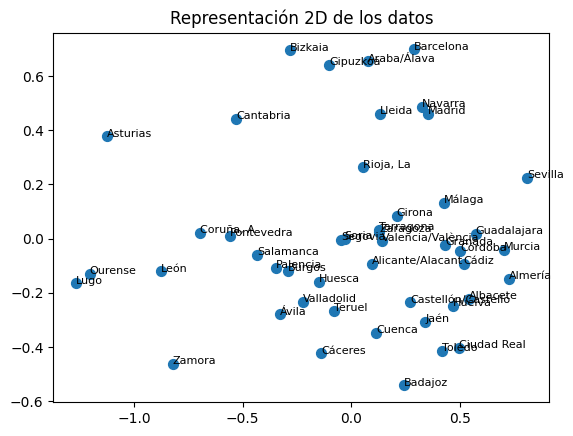

In [84]:
#Representaci√≥n 2D
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1], s=50)

# anotaci√≥n 
for i in range(0, len(X_pca)):
    ax.annotate(df4.iloc[i, :].name, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
ax.set_title("Representaci√≥n 2D de los datos")

Si se compara este gr√°fico con el que se obtiene con la mediana, es una versi√≥n espejada.

> üí° **NOTA**  
> El gr√°fico de la mediana junto con otras t√©cnicas de clustering que se han ejecutado para validar la hip√≥tesis est√°n en el archivo `h4_modeling_otros.ipynb`.

## Modelado

### Clustering jer√°rquico

Hemos elegido el clustering jer√°rquico porque es m√°s flexible a la hora de definir los grupos, no necesita definir el n√∫mero de clusters de antemano y permite ver c√≥mo se agrupan los datos a diferentes niveles de granularidad. Adem√°s, el volumen de datos es peque√±o, por lo que la complejidad computacional no es un problema.	

El clustering con KMeans es m√°s sensible a la inicializaci√≥n de los centroides, a la elecci√≥n del n√∫mero de clusters y a la presencia de outliers. Adem√°s, los clusters que se forman son esf√©ricos y al tener pocos datos, no es necesario asumir esta forma, de hecho en la visualizaci√≥n con PCA se ve que el algoritmo ha dividido los datos simplemente por la mitad del gr√°fico.

Para el clustering jer√°rquico se usar√° el m√©todo de Ward, que minimiza la varianza intra-cluster. Y la m√©trica de distancia ser√° la eucl√≠dea.

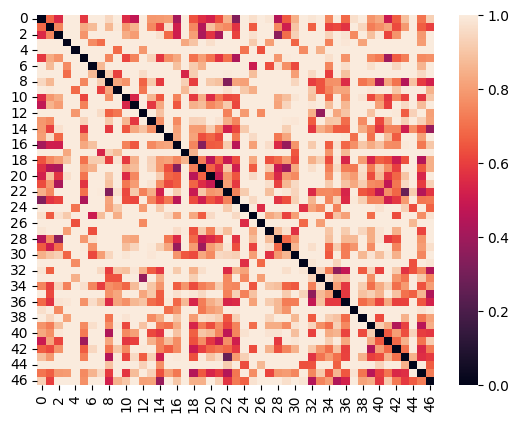

In [85]:
# distancia euclidea entre las provincias
dist = DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(scaled_data)
ax = sns.heatmap(matsim,vmin=0, vmax=1)
plt.show()

En el gr√°fico predominan los colores claros, lo que indica que en general, las provincias est√°n bastante distantes entre s√≠. A continuaci√≥n, se mostrar√° un dendrograma para ver la jerarqu√≠a de los clusters.

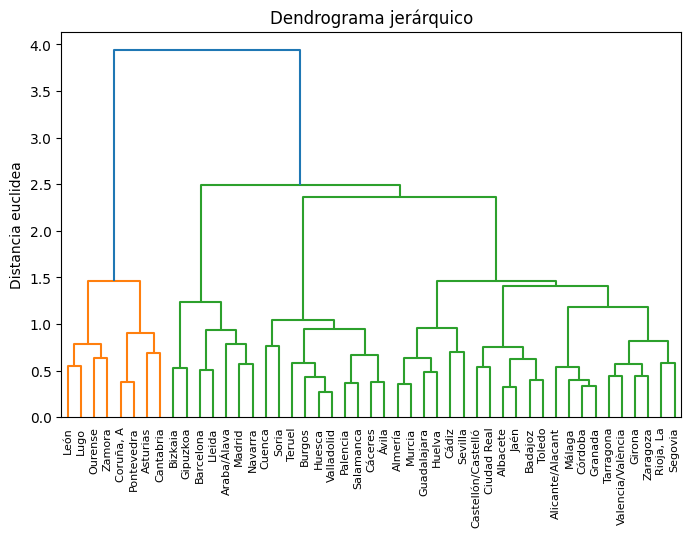

In [86]:
# metodo ward y dendrograma
link_matrix_avg = linkage(df4_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(8, 5))
dendrogram(link_matrix_avg, labels=df4_scaled.index)
plt.title('Dendrograma jer√°rquico')
plt.ylabel('Distancia euclidea')
plt.show()

El dendrograma muestra que hay 2 clusters. 

Se calcular√° el coeficiente de silhouette para evaluar la calidad del distintas configuraciones de clusters.

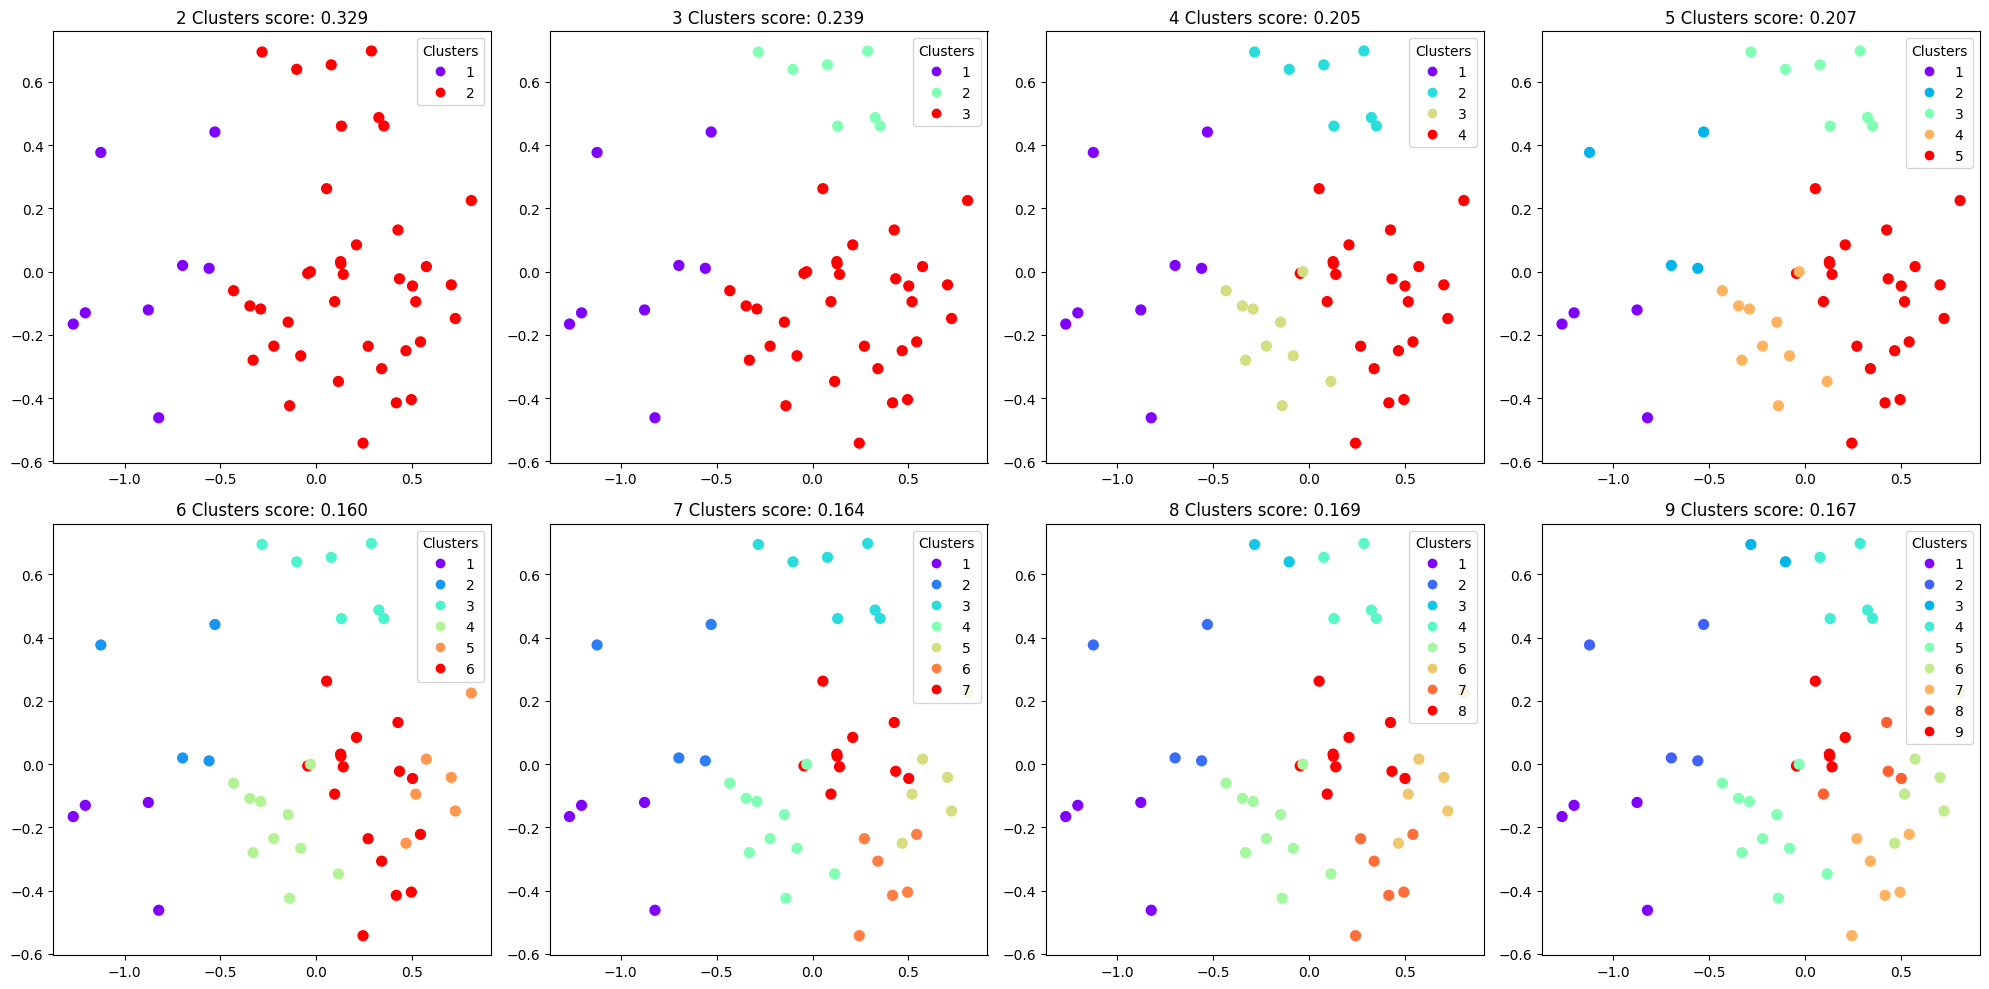

In [87]:
# Visualizaci√≥n de diferente n√∫mero de clusters
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i in range(2, 10):
    clusters = fcluster(link_matrix_avg, t=i, criterion='maxclust')  # Generar i clusters
    scatter = axes[i-2].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='rainbow')
    coef = silhouette_score(df4_scaled, clusters)
    axes[i-2].legend(*scatter.legend_elements(), title="Clusters")
    axes[i-2].set_title(f'{i} Clusters score: {coef:.3f}')

plt.tight_layout()
plt.show()

De todas las combinaciones mostradas, desde 2 a 10 clusters, el gr√°fico muestra que la configuraci√≥n con 2 clusters es la que tiene un coeficiente de silhouette m√°s alto, con un valor de 0.329. Aunque este valor no es muy alto, es el m√°s alto de todos.

In [88]:
# seleccionamos 2 clusters usando el criterio de maxclust
clusters = fcluster(link_matrix_avg, t=2, criterion='maxclust')

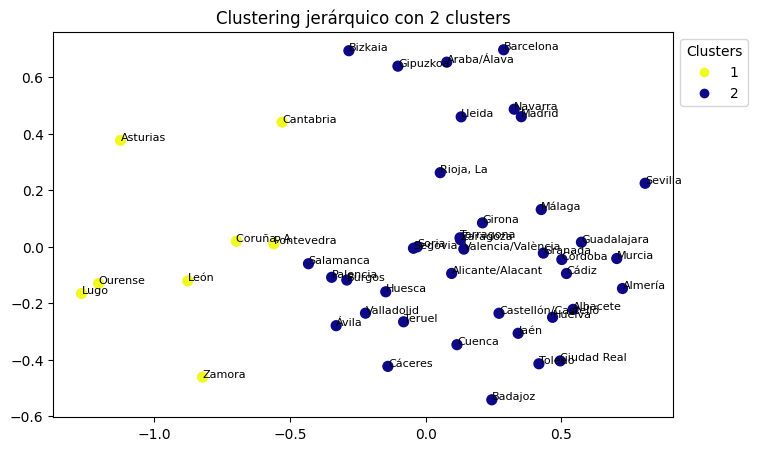

In [89]:
# visualizaci√≥n del resultado
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], s=50, c=clusters, cmap='plasma_r')

# nombres de las provincias 
for i in range(0, len(X_pca)):
    plt.annotate(df4.iloc[i, :].name, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters", bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Clustering jer√°rquico con 2 clusters')
plt.show()

## Resultados

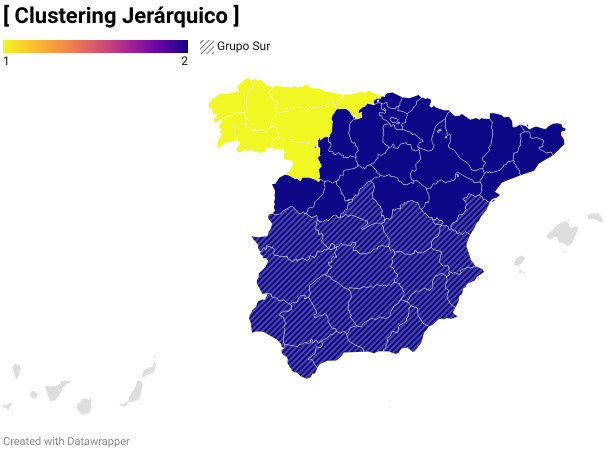

Estos resultados indican que s√≠ se pueden agrupar las provincias en 2 grupos de norte y sur, aunque los grupos no son los que hab√≠amos definido en la hip√≥tesis inicial. En el mapa las provincias con una sombra gris son las que originalmente pertenenc√≠an al grupo del sur, y el resto al del norte. 

Sin embargo, los colores indican dos grupos: noroeste y el resto de la pen√≠nsula. En el noroeste est√°n las provincias de Asturias, Ourense, Lugo, A Coru√±a, Pontevedra, Cantabria, Le√≥n y Zamora.

A continuaci√≥n, se analizar√°n las caracter√≠sticas de los clusters.

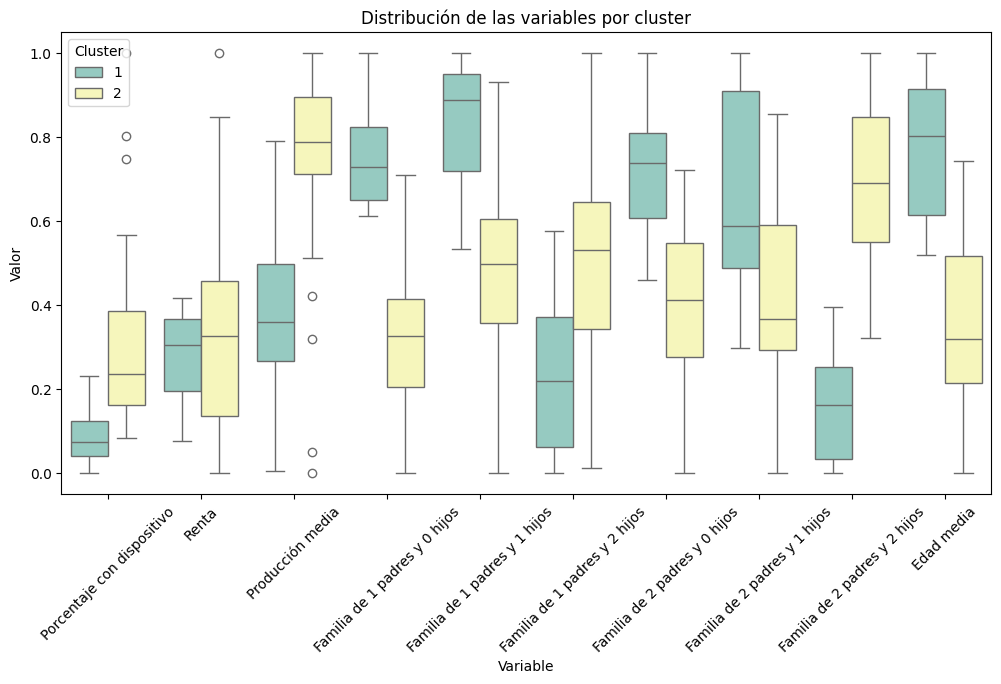

In [90]:
df4_scaled['Cluster'] = clusters
df4_melted = df4_scaled.melt(id_vars="Cluster", var_name="Variable", value_name="Valor")
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="Cluster", data=df4_melted, palette="Set3")
plt.title("Distribuci√≥n de las variables por cluster")
plt.xticks(rotation=45)
plt.show()

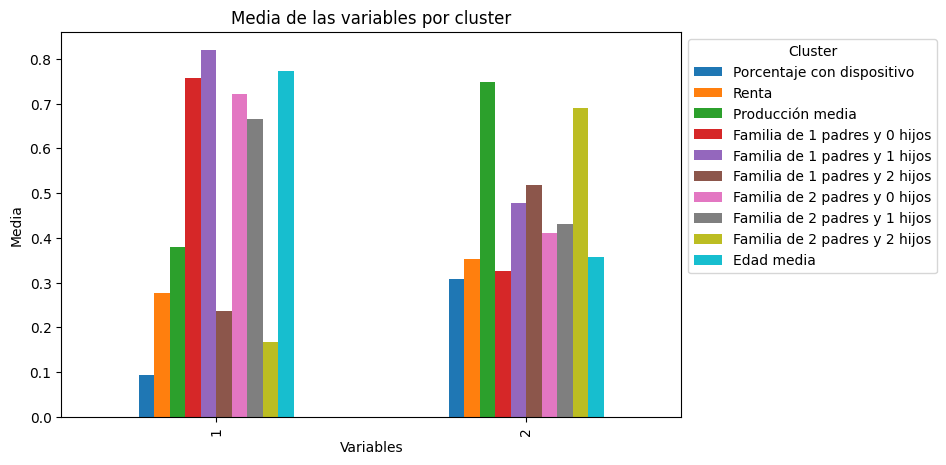

         Porcentaje con dispositivo     Renta  Producci√≥n media  \
Cluster                                                           
1                          0.092918  0.277754          0.379352   
2                          0.307399  0.351957          0.748514   

         Familia de 1 padres y 0 hijos  Familia de 1 padres y 1 hijos  \
Cluster                                                                 
1                             0.756114                       0.819270   
2                             0.325003                       0.477839   

         Familia de 1 padres y 2 hijos  Familia de 2 padres y 0 hijos  \
Cluster                                                                 
1                             0.236190                       0.721432   
2                             0.517317                       0.409743   

         Familia de 2 padres y 1 hijos  Familia de 2 padres y 2 hijos  \
Cluster                                                                

In [91]:
df4_grouped = df4_scaled.groupby('Cluster').mean()

df4_grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Media de las variables por cluster')
plt.xlabel('Variables')
plt.ylabel('Media')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()
print(df4_grouped)

In [92]:
df4[df4_scaled['Cluster'] == 1].describe()

Porcentaje con dispositivo        Renta  Producci√≥n media  \
count                    8.000000      8.00000          8.000000   
mean                     3.701605  30483.62500        110.571591   
std                      0.804306   2288.55606         12.412450   
min                      2.820683  26876.00000         92.622917   
25%                      3.209493  28992.50000        105.189015   
50%                      3.536471  30976.50000        109.613988   
75%                      4.006545  32109.00000        116.368033   
max                      5.031368  33012.00000        130.486618   

       Familia de 1 padres y 0 hijos  Familia de 1 padres y 1 hijos  \
count                       8.000000                       8.000000   
mean                        0.052354                       0.104900   
std                         0.004548                       0.010683   
min                         0.047671                       0.088605   
25%                         0.048926                       0.099264   
50%                         0.051452                       0.108884   
75%                         0.054648                       0.112455   
max                         0.060380                       0.115216   

       Familia de 1 padres y 2 hijos  Familia de 2 padres y 0 hijos  \
count                       8.000000                       8.000000   
mean                        0.033271                       0.425373   
std                         0.006305                       0.028236   
min                         0.026172                       0.387843   
25%                         0.028085                       0.409139   
50%                         0.032796                       0.427875   
75%                         0.037391                       0.438409   
max                         0.043495                       0.465556   

       Familia de 2 padres y 1 hijos  Familia de 2 padres y 2 hijos  \
count                       8.000000                       8.000000   
mean                        0.215302                       0.168800   
std                         0.011131                       0.022520   
min                         0.199525                       0.142937   
25%                         0.207749                       0.148147   
50%                         0.212032                       0.168161   
75%                         0.225901                       0.181970   
max                         0.229773                       0.203907   

       Edad media  
count    8.000000  
mean    48.614938  
std      2.019083  
min     45.913933  
25%     46.944241  
50%     48.964716  
75%     50.172318  
max     51.069587

Las caracter√≠sticas del cluster 1, las provincias del noroeste, son:
- Menor implantaci√≥n de energ√≠a renovable, con una media de **3.7%** de hogares con dispositivos de energ√≠a renovable.
- Renta media por hogar ligeramente inferior al otro cluster, con una media de **30.483‚Ç¨**.
- Menor producci√≥n media de energ√≠a solar y con valores m√°s dispersos (por el clima de la zona, tienen menos horas de sol).
- Mayor porcentaje de familias con 0 y 1 hijos.
- Menor porcentaje de familias con muchos hijos.
- Edad media mayor, con un valor de **48.6 a√±os**.

## Conclusi√≥n 

Hip√≥tesis: *"Las provincias situadas en el sur de Espa√±a (aquellas al sur de Madrid) tienden a utilizar menos dispositivos de aprovechamiento de energ√≠a renovable que las del norte."*

El resultado del clustering jer√°rquico demuestra que la divisi√≥n inicial de las provincias era incorrecta y que la divisi√≥n ideal, si queremos comparar dos grupos, es: noroeste y resto de la pen√≠nsula. 

Las provincias del noroeste tienen una menor implantaci√≥n de energ√≠a renovable, agrupando estas provincias por: edad, climatolog√≠a, tama√±o de la familia y renta.

----------------------------

## Clasificaci√≥n y clustering

Para verificar los resultados obtenidos, se realizar√° una divisi√≥n de las provincias en norte y sur y se etiquetar√°n los grupos. De esta forma, se quiere comprobar si forzando la divisi√≥n en 2 grupos, se obtienen los mismos resultados que con el clustering jer√°rquico.

In [93]:
# Provincias en el dataset
df4.index

Index(['Albacete', 'Alicante/Alacant', 'Almer√≠a', 'Araba/√Ålava', 'Asturias',
       'Badajoz', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria',
       'Castell√≥n/Castell√≥', 'Ciudad Real', 'Coru√±a, A', 'Cuenca', 'C√°ceres',
       'C√°diz', 'C√≥rdoba', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara',
       'Huelva', 'Huesca', 'Ja√©n', 'Le√≥n', 'Lleida', 'Lugo', 'Madrid',
       'Murcia', 'M√°laga', 'Navarra', 'Ourense', 'Palencia', 'Pontevedra',
       'Rioja, La', 'Salamanca', 'Segovia', 'Sevilla', 'Soria', 'Tarragona',
       'Teruel', 'Toledo', 'Valencia/Val√®ncia', 'Valladolid', 'Zamora',
       'Zaragoza', '√Åvila'],
      dtype='object', name='Provincias')

In [94]:
norte=['Araba/√Ålava', 'Asturias', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria', 'Coru√±a, A', 'Gipuzkoa', 'Girona', 'Guadalajara', 'Huesca', 'Le√≥n', 'Lleida', 'Lugo', 'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Rioja, La', 'Salamanca', 'Segovia', 'Soria', 'Tarragona', 'Teruel', 'Valladolid', 'Zamora', 'Zaragoza', '√Åvila']

df4['Grupo'] = [0 if x in norte else 1 for x in df4.index]

In [96]:
df4.head()

Porcentaje con dispositivo    Renta  Producci√≥n media  \
Provincias                                                                
Albacete                            4.314062  29549.0        136.528958   
Alicante/Alacant                    4.036060  27540.0        135.823750   
Almer√≠a                             6.713842  27301.0        140.478389   
Araba/√Ålava                        10.445424  36848.0        107.768333   
Asturias                            5.031368  31841.0         92.622917   

                  Familia de 1 padres y 0 hijos  \
Provincias                                        
Albacete                               0.033132   
Alicante/Alacant                       0.041038   
Almer√≠a                                0.030276   
Araba/√Ålava                            0.033775   
Asturias                               0.056932   

                  Familia de 1 padres y 1 hijos  \
Provincias                                        
Albacete                               0.072565   
Alicante/Alacant                       0.094143   
Almer√≠a                                0.090071   
Araba/√Ålava                            0.097398   
Asturias                               0.115216   

                  Familia de 1 padres y 2 hijos  \
Provincias                                        
Albacete                               0.044648   
Alicante/Alacant                       0.045081   
Almer√≠a                                0.042470   
Araba/√Ålava                            0.045232   
Asturias                               0.035539   

                  Familia de 2 padres y 0 hijos  \
Provincias                                        
Albacete                               0.356690   
Alicante/Alacant                       0.394342   
Almer√≠a                                0.349780   
Araba/√Ålava                            0.401223   
Asturias                               0.432127   

                  Familia de 2 padres y 1 hijos  \
Provincias                                        
Albacete                               0.204834   
Alicante/Alacant                       0.197734   
Almer√≠a                                0.201309   
Araba/√Ålava                            0.194786   
Asturias                               0.211392   

                  Familia de 2 padres y 2 hijos  Edad media  Grupo  
Provincias                                                          
Albacete                               0.288130   43.677523      1  
Alicante/Alacant                       0.227663   43.766889      1  
Almer√≠a                                0.286094   40.320448      1  
Araba/√Ålava                            0.227587   44.565691      0  
Asturias                               0.148794   48.683390      0

In [97]:
df4['Grupo'].value_counts()

Grupo
0    28
1    19
Name: count, dtype: int64

## Entrenamiento y validaci√≥n

Se entrenar√° un modelo de clasificaci√≥n, en este caso se ha elegido un √°rbol de decisi√≥n, para extraer el valor de relevancia de cada variable y as√≠ volver a clusterizar y comparar los resultados.

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df4.drop(columns=["Grupo"])
y = df4["Grupo"]

# se divide el dataset en 30-70 para que el modelo no entrene con demasiados datos y evitar el overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 3, 4, 5, 10, 15, 20, 30, 40, 50],
    'min_samples_split': [2, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1
)

grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree = grid_search.best_estimator_
print(f"Mejores hiperpar√°metros: {grid_search.best_params_}")
print(f"Mejor score (f1-score): {grid_search.best_score_}")

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Mejores hiperpar√°metros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score (f1-score): 0.8380952380952381


In [100]:
pred = best_tree.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



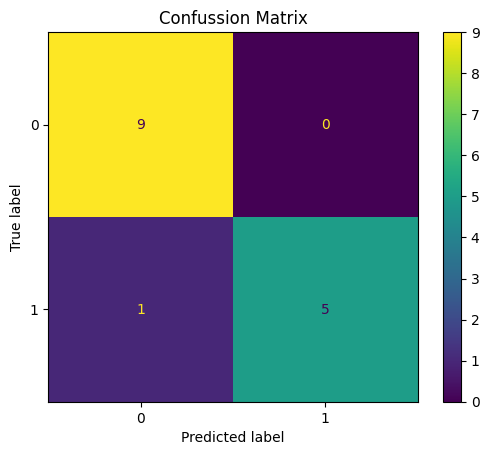

In [101]:
# Evaluaci√≥n de resultados
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
cm_display.plot()
plt.title("Confussion Matrix")
print(classification_report(y_test, pred))

El modelo muestra buenos resultados durante el entrenamiento. Pero al tener muy pocos datos, se comprobar√°n los resultados usando validaci√≥n cruzada del tipo Leave One Out. Este tipo de validaci√≥n tiene un gran coste computacional con grandes volumenes de datos, pero al tener pocos, es la mejor opci√≥n.

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(best_tree, X, y, cv=LeaveOneOut())
print(f"Accuracy: {scores.mean():.2f}")

Accuracy: 0.91


In [103]:
print ('================= Feature Relevances ====================')
importance = pd.DataFrame({'Attributes': X_train.columns,
            'Feature importance':best_tree.feature_importances_}).sort_values('Feature importance', ascending=False)
print(importance)

================= Feature Relevances ====================
                      Attributes  Feature importance
2               Producci√≥n media            0.765568
4  Familia de 1 padres y 1 hijos            0.123077
1                          Renta            0.111355
0     Porcentaje con dispositivo            0.000000
3  Familia de 1 padres y 0 hijos            0.000000
5  Familia de 1 padres y 2 hijos            0.000000
6  Familia de 2 padres y 0 hijos            0.000000
7  Familia de 2 padres y 1 hijos            0.000000
8  Familia de 2 padres y 2 hijos            0.000000
9                     Edad media            0.000000


In [104]:
# seleccion de las dos variables m√°s importantes
variables = importance.iloc[:3]['Attributes'].values

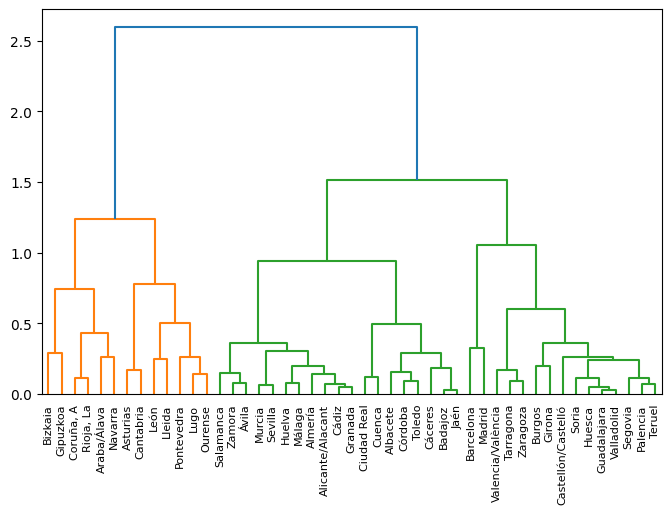

In [105]:
selection = df4_scaled[variables]

link_matrix_avg = linkage(selection, method='ward', metric='euclidean')

plt.figure(figsize=(8, 5))
dendrogram(link_matrix_avg, labels=df4.index)
plt.show()

In [106]:
clusters = fcluster(link_matrix_avg, t=2, criterion='maxclust')
print("coeficiente de silhouette: ",silhouette_score(selection, clusters))

coeficiente de silhouette:  0.4212118683379566


Los resultados son similares a los obtenidos en el primer clustering jer√°rquico, aunque este ten√≠a un menor coeficiente de silhouette. Las provincias de Galicia, Asturias y Cantabria siguen agrupadas en el mismo cluster.

Sin embargo, la selecci√≥n de caracter√≠sticas depende del par√°metro `random_state` del modelo Random Forest, por lo que los resultados pueden variar y no se usar√°n para la interpretaci√≥n final.